In [3]:
#Data Description:
#The file Bank.xls contains data on 5000 customers. The data include customer demographic information 
#(age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), 
#and the customer response to the last personal loan campaign (Personal Loan). 
#Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in 
#the earlier campaign.

#Domain:
#Banking

#Context:
#This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability 
#customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran 
#last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged 
#the retail marketing department to devise campaigns with better target marketing to increase the success ratio 
#with minimal budget.

#Attribute Information: 
#
# ID : Customer ID 
# Age : Customer's age in completed years
# Experience : #years of professional experience 
# Income : Annual income of the customer ($000)
# ZIP Code : Home Address ZIP code.
# Family : Family size of the customer 
# CCAvg : Avg. spending on credit cards per month ($000)
# Education : Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional 
# Mortgage : Value of house mortgage if any. ($000) 
# Personal Loan : Did this customer accept the personal loan offered in the last campaign?
# Securities Account : Does the customer have a securities account with the bank?
# CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
# Online : Does the customer use internet banking facilities? 
# Credit card : Does the customer use a credit card issued by UniversalBank?

In [155]:
#Import all the necessary modules
import pandas as pandas
import numpy as numpy
import os
import matplotlib.pyplot as matplot
%matplotlib inline
import seaborn as sns
from Custom import Perform_EDA as EDA
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [254]:
Source = pandas.read_csv("Bank_Personal_Loan_Modelling.csv")

In [255]:
#Understand the data set

#Data skimmed through to see what are the variables present, data type, shape, column names, mixed data types, 
#missing values etc

Source.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [8]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
Source.shape

(5000, 14)

In [10]:
Source["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [11]:
480/5000

0.096

In [36]:
Source["Personal Loan"] = pandas.Categorical(Source["Personal Loan"])

In [37]:
Source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


In [38]:
EDA.EDA(Source)

Total Missing Values =  0.0 Data Points, Contributing to  0.0 %
Columns with values as 0

 0            Experience
1                 CCAvg
2              Mortgage
3    Securities Account
4            CD Account
5                Online
6            CreditCard
dtype: object 


Columns with numnber of Zeros

Experience    = 66
CCAvg    = 106
Mortgage    = 3462
Securities Account    = 4478
CD Account    = 4698
Online    = 2016
CreditCard    = 3530


count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.134600    11.415189     0.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max    Kurtosis   Skewness  \
ID                   2500.5   3750.25   5000.0   -1.200000   0.000000   
Age                    45.0     55.00     67.0   -1.153067  -0.029341   
Experience             20.0     30.00     43.0   -1.144457  -0.010038   
Income                 64.0     98.00    224.0   -0.044244   0.841339   
ZIP Code            93437.0  94608.00  96651.0  486.204272 -12.500221   
Family                  2.0      3.00      4.0   -1.403586   0.155221   
CCAvg                   1.5      2.50     10.0    2.646706   1.598443   
Education               2.0      3.00      3.0   -1.546116   0.227093   
Mortgage                0.0    101.00    635.0    4.756797   2.104002   
Securities Account      0.0      0.00      1.0    4.701013   2.588268   
CD Account              0.0      0.00      1.0   11.633404   3.691714   
Online                  1.0      1.00      1.0   -1.844883  -0.394785   
CreditCard              0.0      1.00      1.0   -1.182191   0.904589   

                      Range     IQR  Missing Values  
ID                   4999.0  2499.5             0.0  
Age                    44.0    20.0             0.0  
Experience             43.0    20.0             0.0  
Income                216.0    59.0             0.0  
ZIP Code            87344.0  2697.0             0.0  
Family                  3.0     2.0             0.0  
CCAvg                  10.0     1.8             0.0  
Education               2.0     2.0             0.0  
Mortgage              635.0   101.0             0.0  
Securities Account      1.0     0.0             0.0  
CD Account              1.0     0.0             0.0  
Online                  1.0     1.0             0.0  
CreditCard              1.0     1.0             0.0

Columns that are int32,int64 =  Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'Education',
       'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')
Columns that are flaot32,float64 =  Index(['CCAvg'], dtype='object')
Columns that are objects =  Index([], dtype='object')


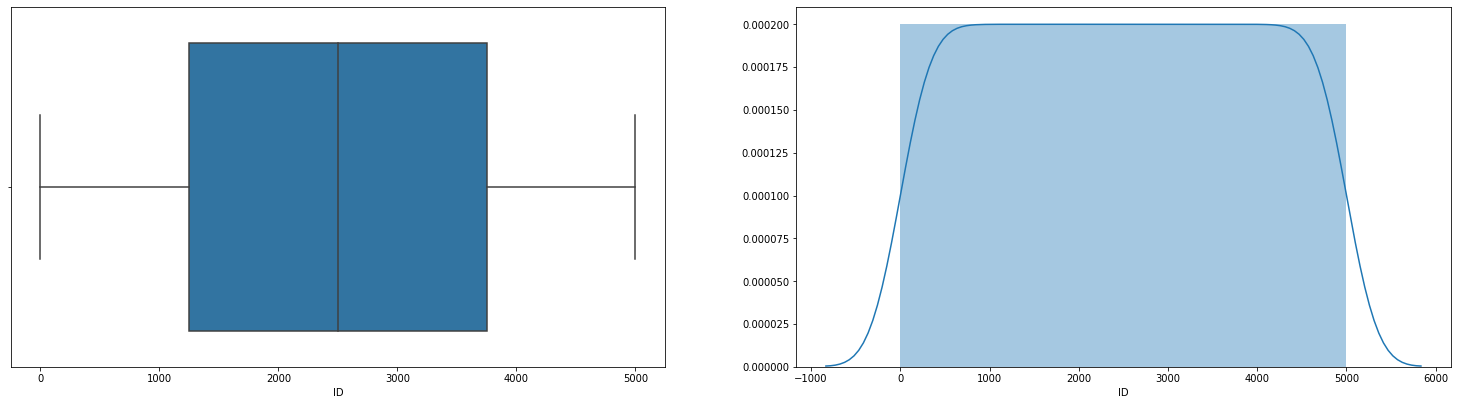

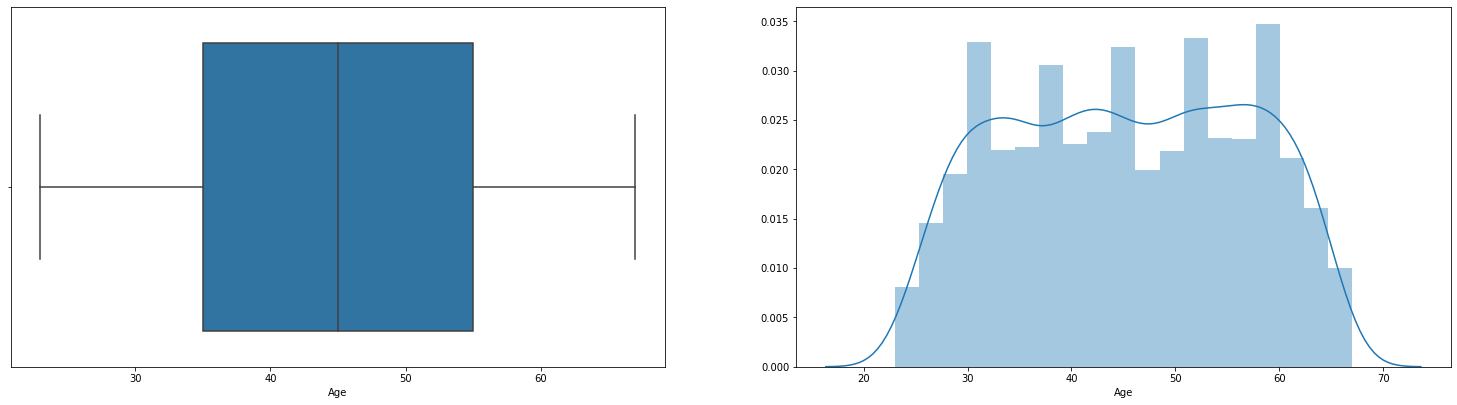

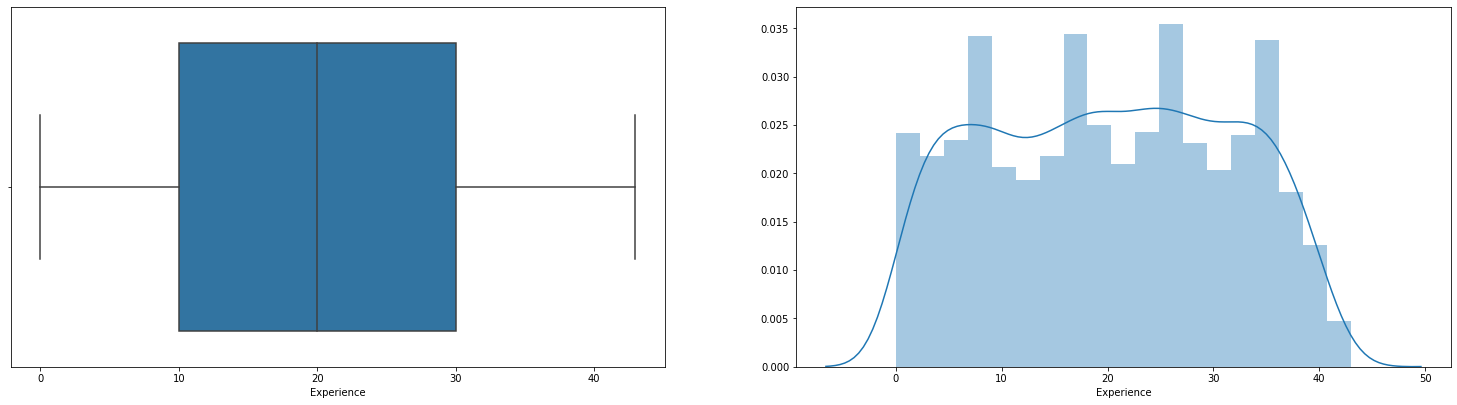

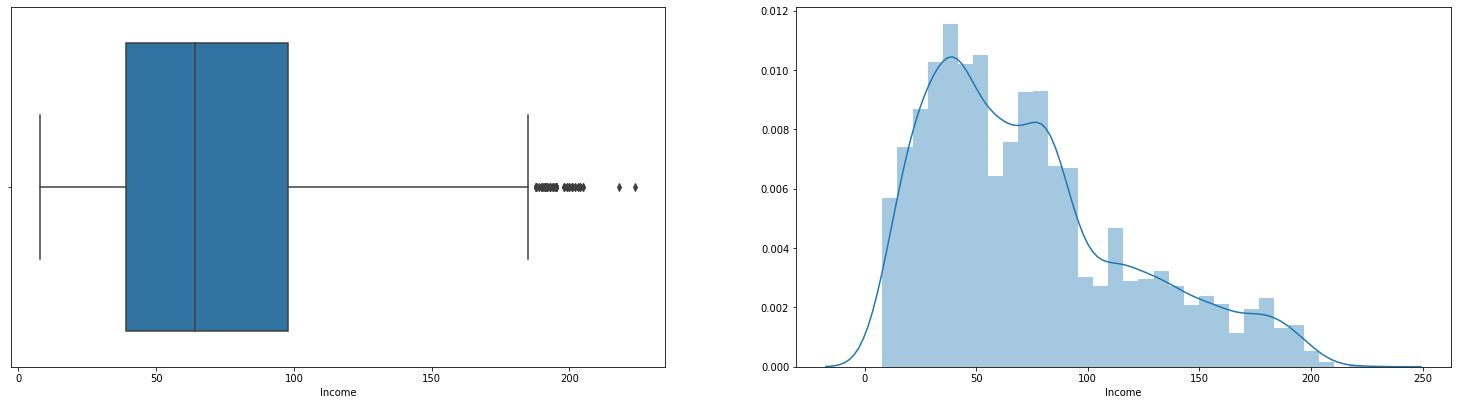

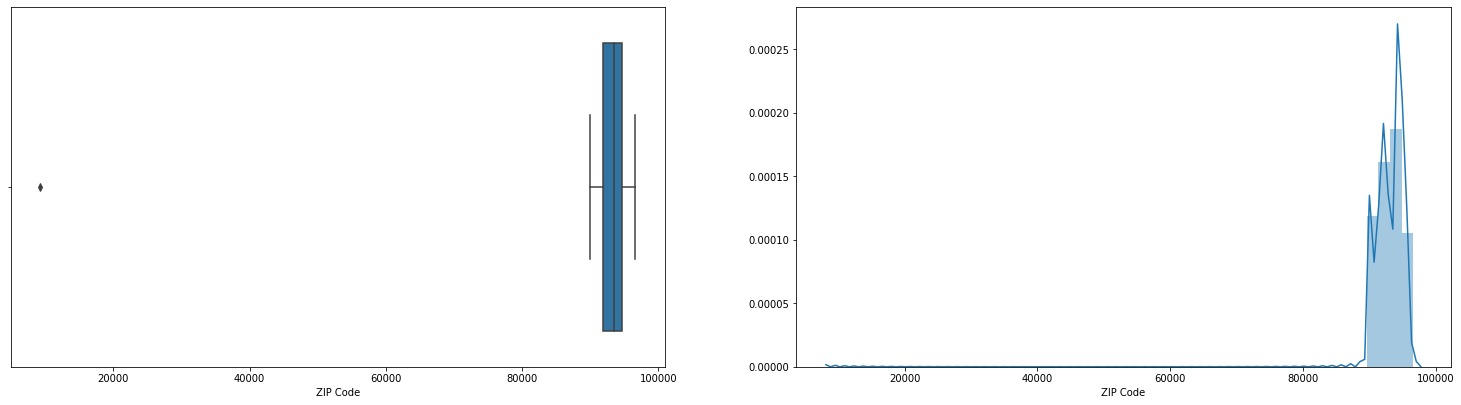

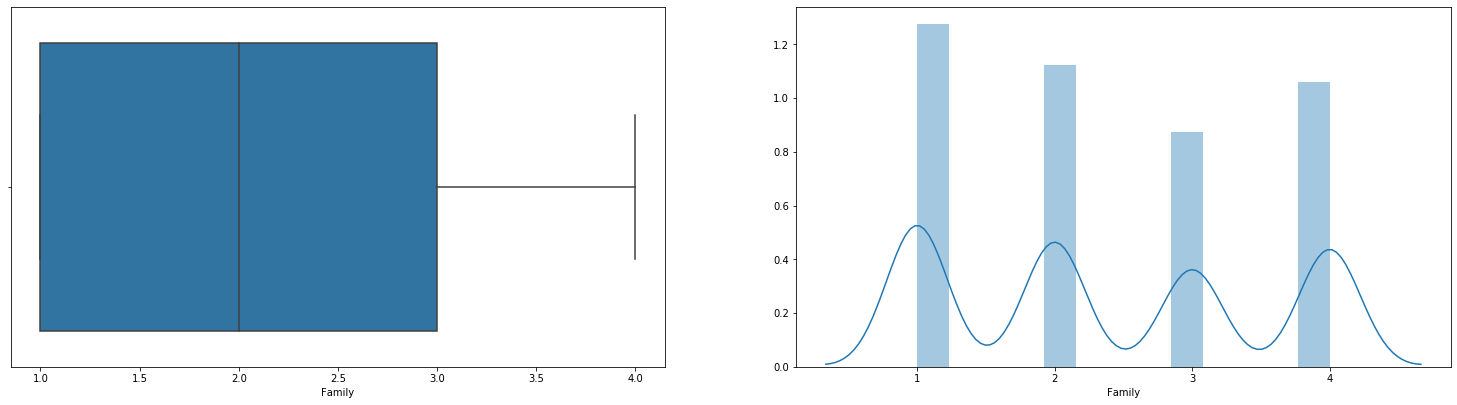

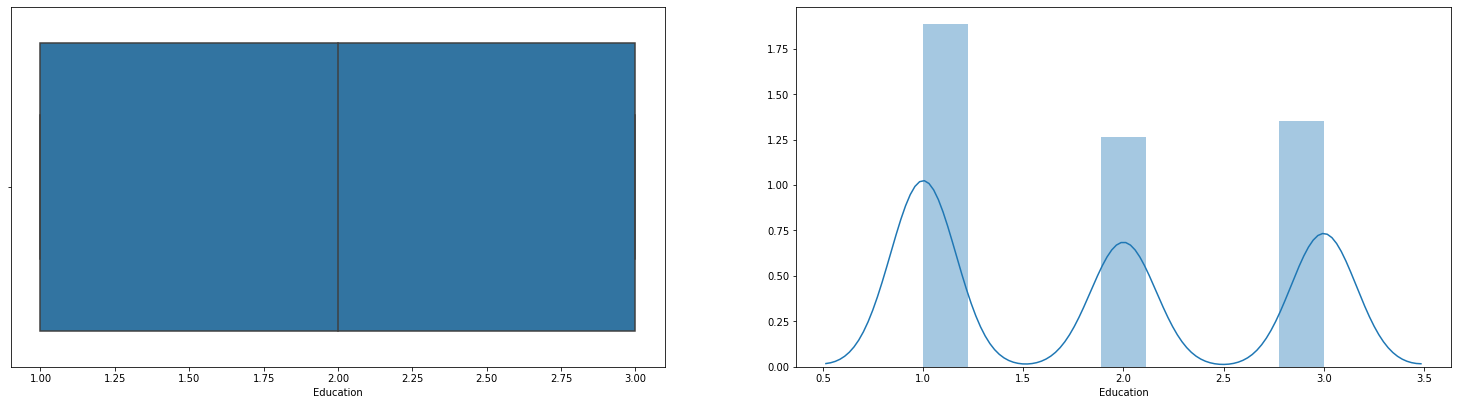

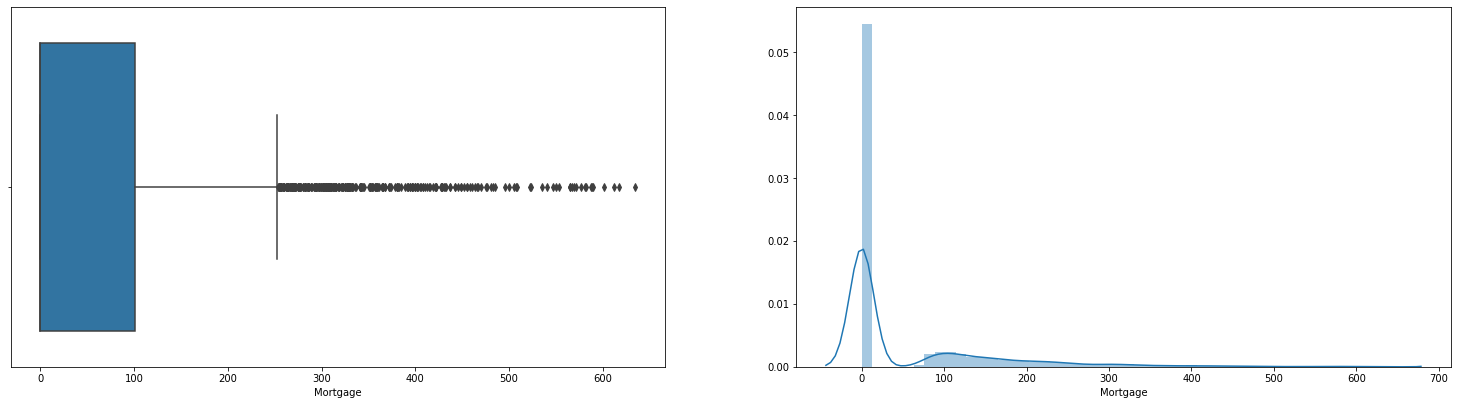

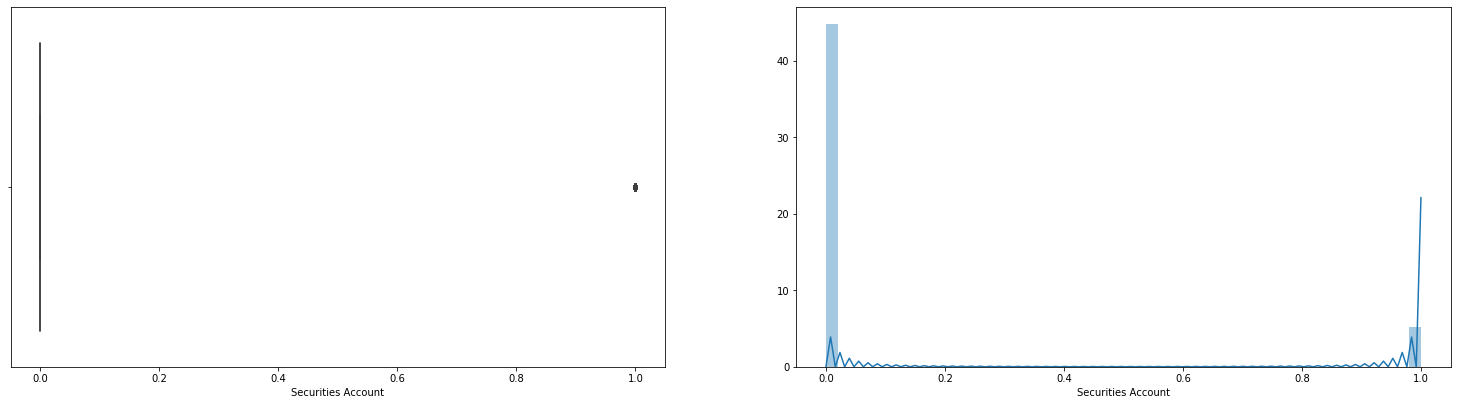

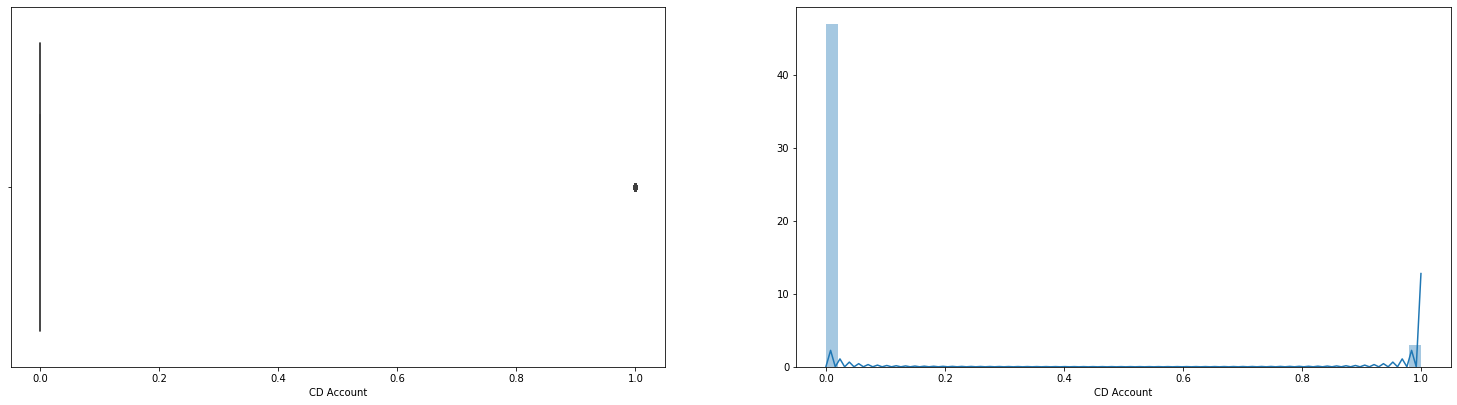

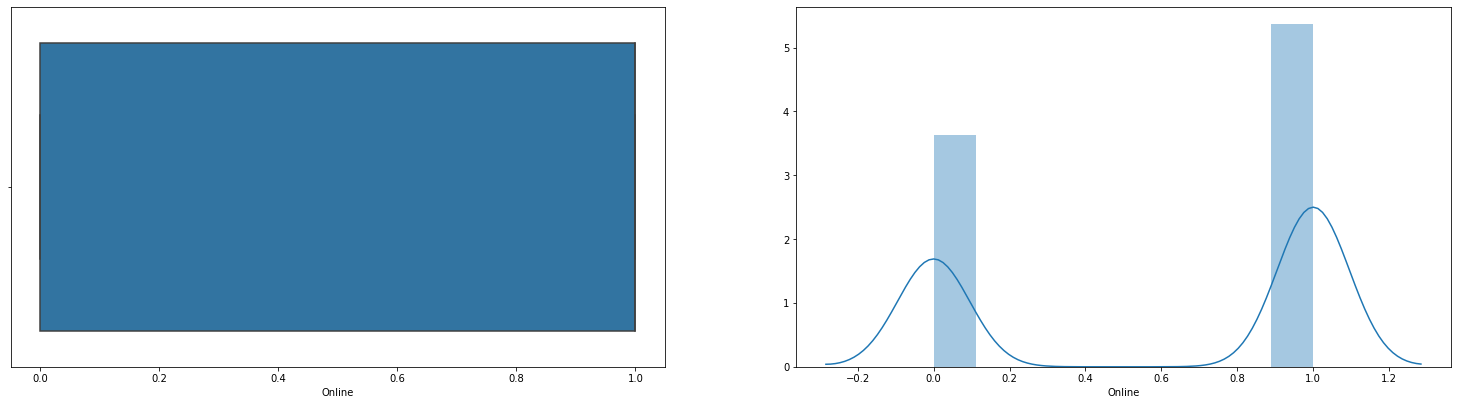

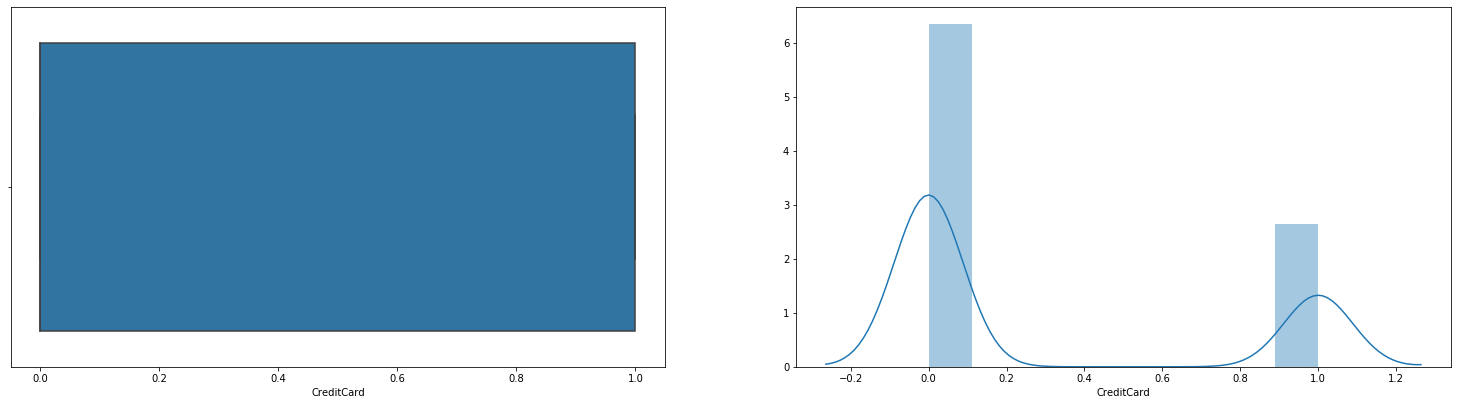

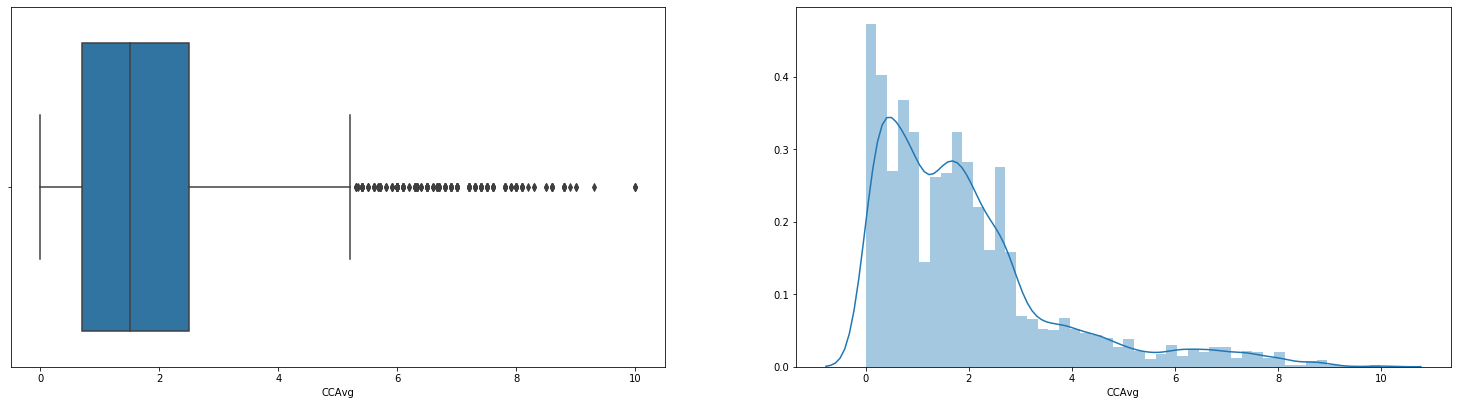

In [39]:
EDA.univariate_plots(Source)

In [51]:
#There are negative numbmers in experience! maybe typing error. 
# Convert to non-negative using .abs function

Source['Experience'] = Source['Experience'].abs()

Source.describe().transpose()

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.134600    11.415189     0.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.305809     0.0      0.00   
CD Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal Loan           0.0      0.00      1.0  
Securities Account      0.0      0.00      1.0  
CD Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

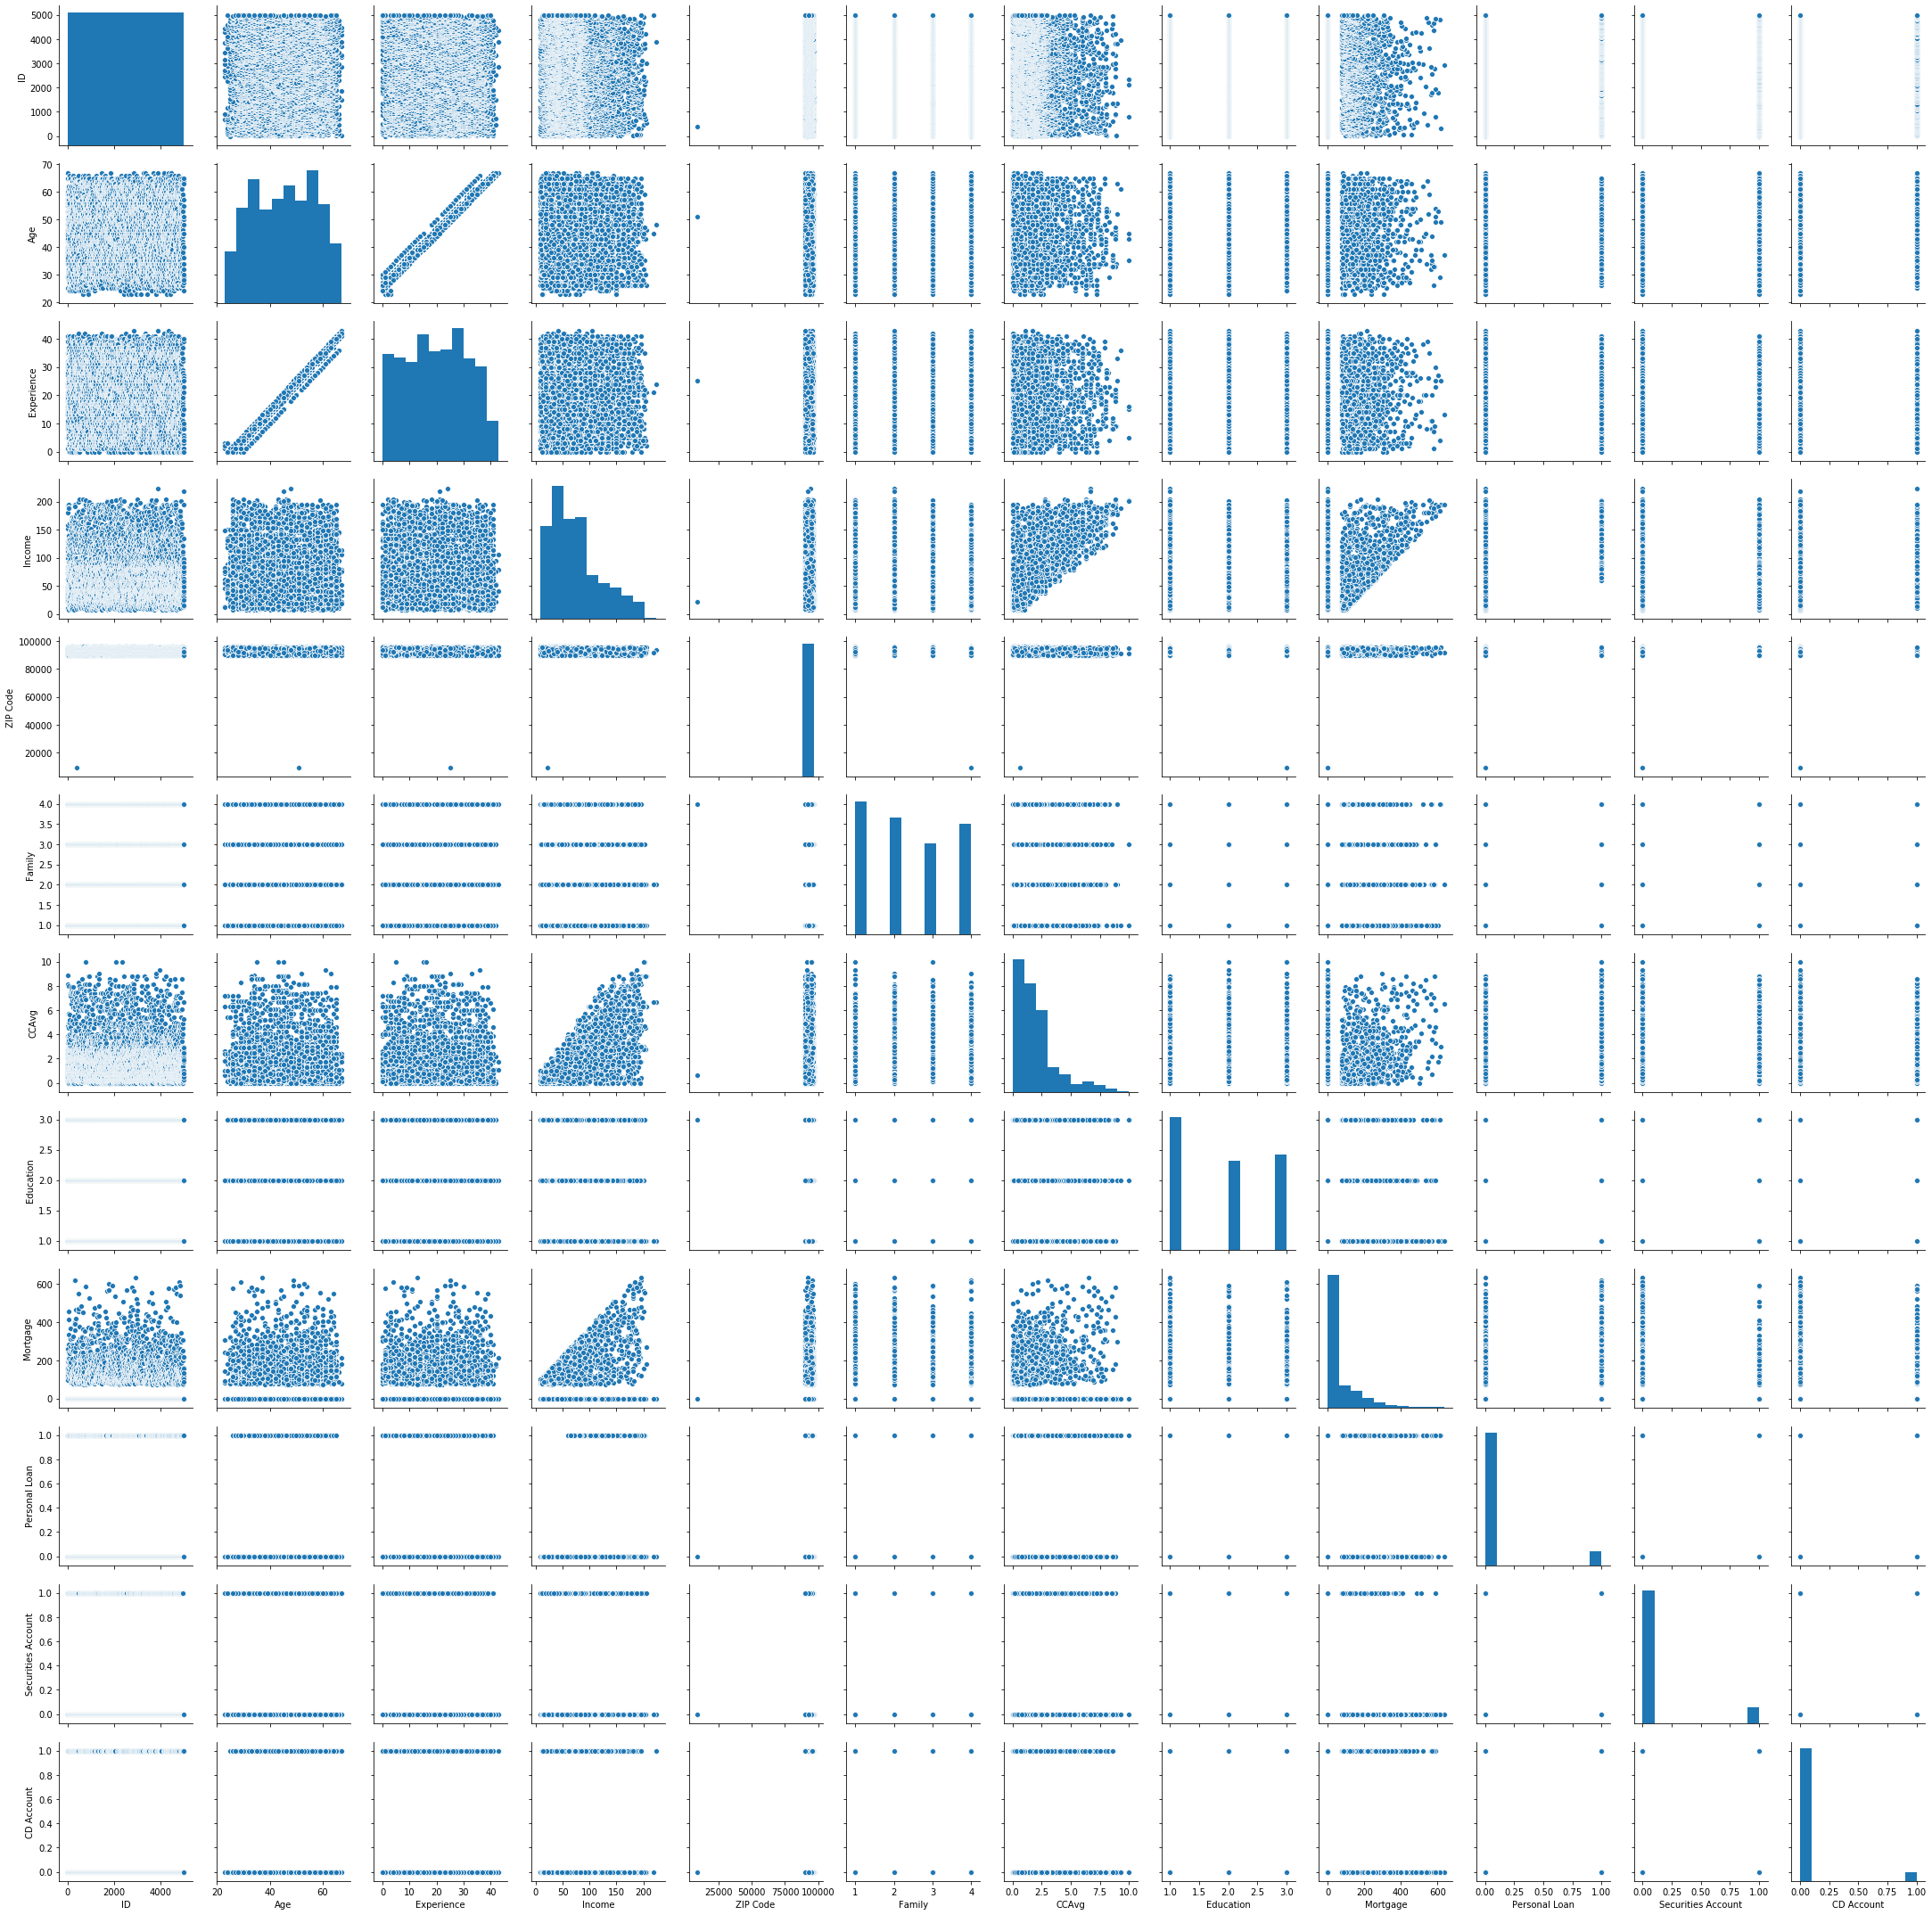

In [214]:
#compare all attributes visually to check for relationships that can be exploited
Source_attr = Source.iloc[:,0:12]
sns.pairplot(Source_attr)

Feature  Uniqueness  Positive rel  inverse rel  \
0                   ID          13             1            0   
1                  Age          12             2            0   
2           Experience          12             2            0   
3               Income          11             3            0   
4             ZIP Code          13             1            0   
5               Family          13             1            0   
6                CCAvg          12             2            0   
7            Education          13             1            0   
8             Mortgage          13             1            0   
9        Personal Loan          12             2            0   
10  Securities Account          13             1            0   
11          CD Account          13             1            0   
12              Online          13             1            0   
13          CreditCard          13             1            0   

                               Pos Neg  \
0                             [ID]  []   
1                [Age, Experience]  []   
2                [Age, Experience]  []   
3   [Income, CCAvg, Personal Loan]  []   
4                       [ZIP Code]  []   
5                         [Family]  []   
6                  [Income, CCAvg]  []   
7                      [Education]  []   
8                       [Mortgage]  []   
9          [Income, Personal Loan]  []   
10            [Securities Account]  []   
11                    [CD Account]  []   
12                        [Online]  []   
13                    [CreditCard]  []   

                                                   No  
0   [Age, Experience, Income, ZIP Code, Family, CC...  
1   [ID, Income, ZIP Code, Family, CCAvg, Educatio...  
2   [ID, Income, ZIP Code, Family, CCAvg, Educatio...  
3   [ID, Age, Experience, ZIP Code, Family, Educat...  
4   [ID, Age, Experience, Income, Family, CCAvg, E...  
5   [ID, Age, Experience, Income, ZIP Code, CCAvg,...  
6   [ID, Age, Experience, ZIP Code, Family, Educat...  
7   [ID, Age, Experience, Income, ZIP Code, Family...  
8   [ID, Age, Experience, Income, ZIP Code, Family...  
9   [ID, Age, Experience, ZIP Code, Family, CCAvg,...  
10  [ID, Age, Experience, Income, ZIP Code, Family...  
11  [ID, Age, Experience, Income, ZIP Code, Family...  
12  [ID, Age, Experience, Income, ZIP Code, Family...  
13  [ID, Age, Experience, Income, ZIP Code, Family...

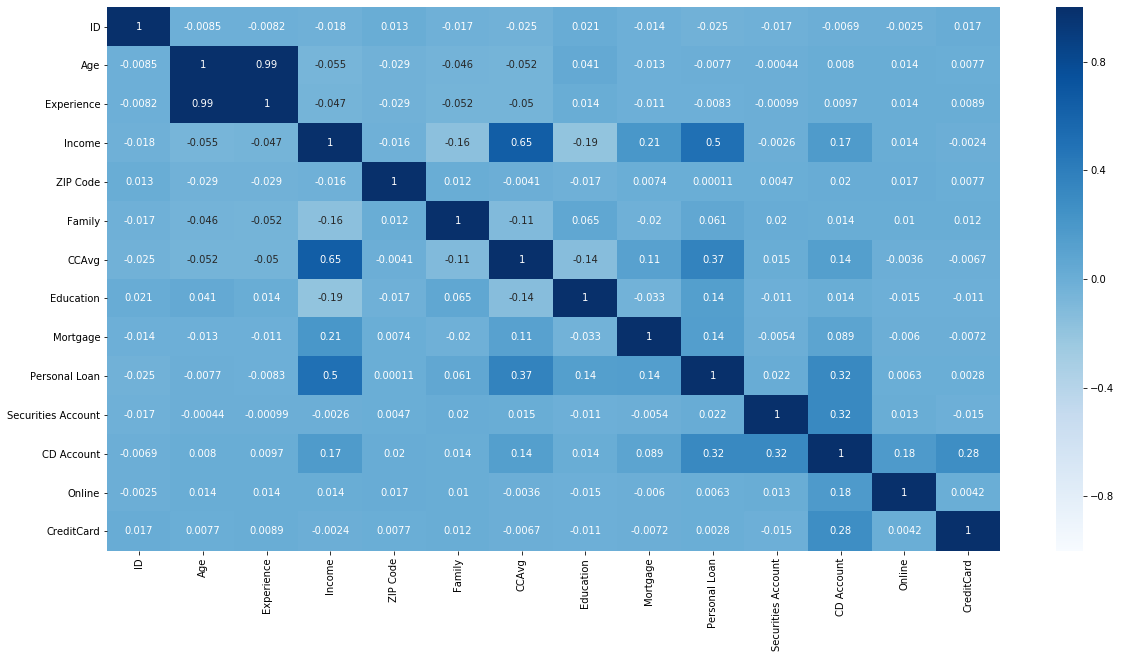

In [213]:
EDA.EDA_Corr(Source)

In [ ]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship


# Build a Logistic Regression Model

In [44]:
Source.groupby(["Personal Loan"]).count()  

ID   Age  Experience  Income  ZIP Code  Family  CCAvg  \
Personal Loan                                                            
0              4520  4520        4520    4520      4520    4520   4520   
1               480   480         480     480       480     480    480   

               Education  Mortgage  Securities Account  CD Account  Online  \
Personal Loan                                                                
0                   4520      4520                4520        4520    4520   
1                    480       480                 480         480     480   

               CreditCard  
Personal Loan              
0                    4520  
1                     480

In [225]:
# Separate the independent attributes i.e. columns 0 to 8 and store them in X array
# Store the target column (column 8) into Y array

X_Source = Source.loc[:, Source.columns != 'Personal Loan']
y_Source = Source.loc[:, Source.columns == 'Personal Loan']

In [226]:
X_Source.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

In [74]:
y_Source[0:5]

Personal Loan
0             0
1             0
2             0
3             0
4             0

In [75]:
Source['Personal Loan'][0:5]

0    0
1    0
2    0
3    0
4    0
Name: Personal Loan, dtype: int64

In [55]:
X_Source.shape

(5000, 13)

In [229]:
X_train, X_test, Y_train, Y_test = train_test_split(X_Source, y_Source, test_size=.3, random_state=100)

In [230]:
X_train.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
4966  4967   41          17      34     91361       1    0.7          1   
4086  4087   50          26      11     93106       4    0.2          1   
2881  2882   49          25      55     92103       4    0.1          3   
1237  1238   38          13     169     92093       1    6.8          3   
1429  1430   31           5      35     95064       1    0.6          3   

      Mortgage  Securities Account  CD Account  Online  CreditCard  
4966       143                   0           0       0           0  
4086         0                   1           0       0           0  
2881         0                   0           0       1           0  
1237         0                   0           1       1           1  
1429       171                   0           0       0           0

In [62]:
Y_train.head()

Personal Loan
4966             0
4086             0
2881             0
1237             1
1429             0

# Logistic Regression Model

In [231]:
logmodel = LogisticRegression()

In [232]:
Logistic_Reg_Model = logmodel.fit(X_train,Y_train)

In [233]:
Logistic_Reg_Model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [234]:
predictions = Logistic_Reg_Model.predict(X_test)

In [235]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
Y_test[0:10]

Personal Loan
789              0
2507             0
2376             0
1378             0
598              0
1589             1
2580             0
366              0
2320             0
1247             0

In [236]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1342
           1       0.57      0.30      0.39       158

    accuracy                           0.90      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.88      0.90      0.89      1500



In [ ]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
#high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)


In [80]:
confusion_matrix(Y_test,predictions)

array([[1306,   36],
       [ 111,   47]])

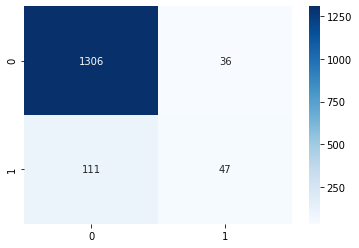

In [81]:
sns.heatmap(confusion_matrix(Y_test,predictions), annot=True, cmap='Blues',fmt='g')

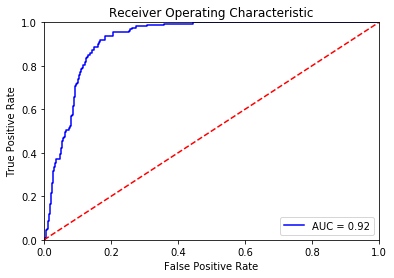

In [86]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Logistic_Reg_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics

# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
Logistic_Accuracy = accuracy_score(Y_test,predictions)
Logistic_Accuracy

0.902

In [90]:
Logistic_Gini = 2 * roc_auc - 1
Logistic_Gini

0.8414042898375746

In [91]:
Logistic_AUC = roc_auc
Logistic_AUC

0.9207021449187873

# Naive Bayes - Gaussian

In [94]:
Naive = GaussianNB()

In [95]:
Naive_model = Naive.fit(X_train,Y_train)

In [96]:
Naive_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [97]:
Naive_predictions = Naive_model.predict(X_test)

In [98]:
Naive_predictions

array([0, 0, 0, ..., 1, 0, 1])

In [99]:
print(classification_report(Y_test,Naive_predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1342
           1       0.48      0.62      0.54       158

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.74      1500
weighted avg       0.90      0.89      0.89      1500



In [ ]:
# Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). 

In [189]:
confusion_matrix(Y_test,Naive_predictions)

array([[1234,  108],
       [  60,   98]])

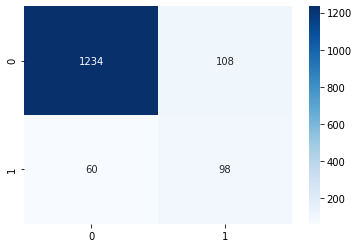

In [100]:
sns.heatmap(confusion_matrix(Y_test,Naive_predictions), annot=True, cmap='Blues',fmt='g')

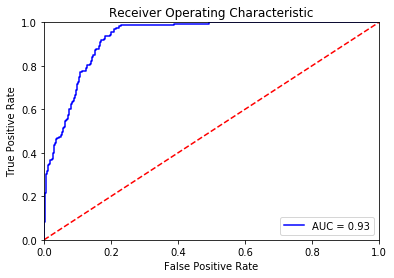

In [177]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = Naive_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [102]:
Naive_Accuracy = accuracy_score(Y_test,Naive_predictions)
Naive_Accuracy

0.888

In [103]:
Naive_Gini = 2 * roc_auc - 1
Naive_Gini

0.8591654247391951

In [104]:
Naive_AUC = roc_auc
Naive_AUC

0.9295827123695976

# KNN Classifier

In [107]:
KNN = KNeighborsClassifier()

In [108]:
KNN_model = KNN.fit(X_train,Y_train)

In [109]:
KNN_predictions = KNN_model.predict(X_test)

In [110]:
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [127]:
N = [3,5,7,9,11,13,15,17]

ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in N:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)

In [128]:
pandas.DataFrame(ac_scores,N)

0
3   0.884000
5   0.890000
7   0.892667
9   0.894667
11  0.894667
13  0.894667
15  0.894667
17  0.894667

In [141]:
Dist = [1,2]
ac_scores = []


for k in Dist:
    knn = KNeighborsClassifier(n_neighbors=5,p=k)
    knn.fit(X_train, Y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(Y_test, y_pred)
    ac_scores.append(scores)



In [142]:
pandas.DataFrame(ac_scores,Dist)

0
1  0.888667
2  0.890000

In [136]:
KNN = KNeighborsClassifier(n_neighbors=5,p=2)

In [137]:
KNN_model = KNN.fit(X_train,Y_train)

In [138]:
KNN_predictions = KNN_model.predict(X_test)

In [139]:
KNN_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
print(classification_report(Y_test,KNN_predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1342
           1       0.18      0.01      0.02       158

    accuracy                           0.89      1500
   macro avg       0.54      0.50      0.48      1500
weighted avg       0.82      0.89      0.85      1500



In [143]:
# Recall for class 1 is the least. That is because majority of data points belong to class 0
# and in KNN, probability of finding data points from class 0 closer to a test point than a 
# data point from class 1 is high.


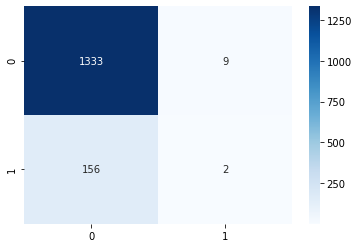

In [116]:
sns.heatmap(confusion_matrix(Y_test,KNN_predictions), annot=True, cmap='Blues',fmt='g')

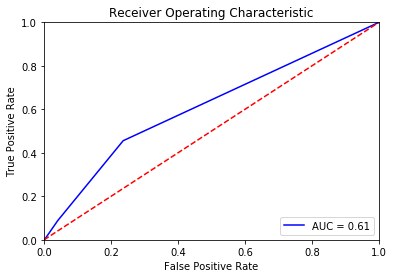

In [117]:
# calculate the  false positive results(fpr) and true positive results(tpr) for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = KNN_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [118]:
KNN_Accuracy = accuracy_score(Y_test,KNN_predictions)
KNN_Accuracy

0.89

In [119]:
KNN_Gini = 2 * roc_auc - 1
KNN_Gini

0.2216510403893679

In [120]:
KNN_AUC = roc_auc
KNN_AUC

0.610825520194684

In [277]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
#X_train_scaled = preprocessing.scale(X_train)
#X_test_scaled = preprocessing.scale(X_test)
#KNN.fit(X_train_scaled, Y_train)

Source_Subset = Source[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

#Scale the data using the Zscore function defined earlier. Can use Minmax scalar, standard scalar etc in scikit learn
X_Scaled = Source_Subset.apply(zscore)

In [278]:
#Performing train test split again

X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, y_Source, test_size=.3, random_state=100)

In [279]:
X_train.head()

ID       Age  Experience    Income  ZIP Code    Family     CCAvg  \
4966  1.708670 -0.378464   -0.270720 -0.864023 -0.844311 -1.216733 -0.708341   
4086  1.099050  0.406659    0.514076 -1.363657 -0.021916  1.397274 -0.994438   
2881  0.264285  0.319423    0.426877 -0.407836 -0.494616  1.397274 -1.051657   
1237 -0.874598 -0.640172   -0.619518  2.068609 -0.499329 -1.216733  2.782043   
1429 -0.741590 -1.250824   -1.317114 -0.842300  0.900862 -1.216733 -0.765560   

      Education  Mortgage  Personal Loan  Securities Account  CD Account  \
4966  -1.048973  0.850437      -0.325843           -0.341389   -0.253515   
4086  -1.048973 -0.555468      -0.325843            2.928622   -0.253515   
2881   1.332351 -0.555468      -0.325843           -0.341389   -0.253515   
1237   1.332351 -0.555468       3.068352           -0.341389    3.943752   
1429   1.332351  1.125719      -0.325843           -0.341389   -0.253515   

        Online  CreditCard  
4966 -1.216496   -0.645250  
4086 -1.216496   -0.645250  
2881  0.821869   -0.645250  
1237  0.821869    1.549477  
1429 -1.216496   -0.645250

In [280]:
KNN.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [281]:
KNN_predictions_scaled = KNN.predict(X_test)

In [282]:
print(metrics.confusion_matrix(Y_test, KNN_predictions_scaled))

[[1342    0]
 [   0  158]]


In [283]:
# summarize the fit of the model
print(metrics.classification_report(Y_test, KNN_predictions_scaled))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1342
           1       1.00      1.00      1.00       158

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [ ]:
# Scaled KNN algorithm gives the best result for class 1 till now.

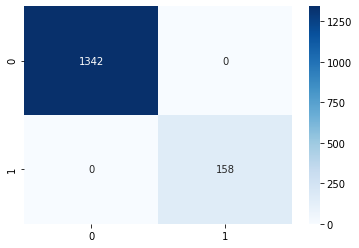

In [284]:
sns.heatmap(confusion_matrix(Y_test,KNN_predictions_scaled), annot=True, cmap='Blues',fmt='g')

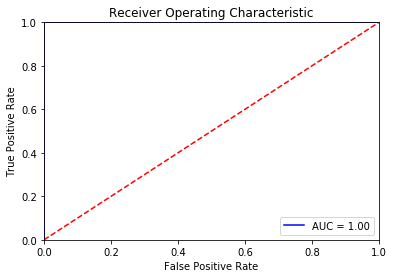

In [285]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = KNN_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [286]:
KNN_Accuracy_scaled = accuracy_score(Y_test,KNN_predictions_scaled)
KNN_Accuracy_scaled

1.0

In [ ]:
#Accuracy shows the percentage of the correct classifications with respect to the all samples.
#But it does not say anything about the performances for negative and positive classes. 

In [287]:
KNN_Gini_scaled = 2 * roc_auc - 1
KNN_Gini_scaled

1.0

In [288]:
KNN_AUC_scaled = roc_auc
KNN_AUC_scaled

1.0

# Support Vector Classifier - Linear Kernel

In [156]:
SVM_Model = svm.SVC(kernel = 'linear', C = 100, probability=True)

In [157]:
SVM_Model.fit(X_train,Y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [158]:
SVM_Predictions = SVM_Model.predict(X_test)

In [159]:
SVM_Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [160]:
print(classification_report(Y_test,SVM_Predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1342
           1       0.59      0.28      0.38       158

    accuracy                           0.90      1500
   macro avg       0.76      0.63      0.66      1500
weighted avg       0.89      0.90      0.89      1500



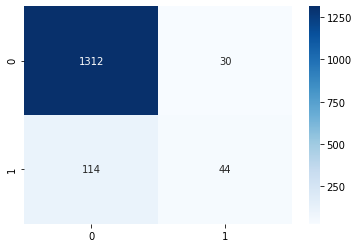

In [162]:
sns.heatmap(confusion_matrix(Y_test,SVM_Predictions), annot=True, cmap='Blues',fmt='g')

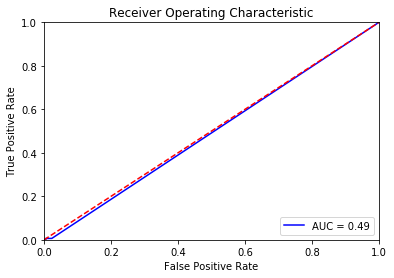

In [197]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = SVM_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [198]:
SVM_Accuracy_Linear = accuracy_score(Y_test,SVM_Predictions)
SVM_Accuracy_Linear

0.8946666666666667

In [199]:
SVM_Gini_Linear = 2*roc_auc - 1
SVM_Gini_Linear

-0.016690561980041152

In [209]:
SVM_AUC_Linear = roc_auc
SVM_AUC_Linear

0.4916547190099794

In [210]:
#This is the worst situation. When AUC is approximately 0.5, model has no discrimination capacity 
#to distinguish between positive class and negative class.

# Support Vector Classifier - RBF Kernel

In [169]:
SVM_Model = svm.SVC(kernel = 'rbf', C = 100, probability=True)
SVM_Model.fit(X_train,Y_train)
SVM_Predictions = SVM_Model.predict(X_test)
SVM_Predictions

array([0, 0, 0, ..., 0, 0, 0])

In [227]:
print(classification_report(Y_test,SVM_Predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1342
           1       0.00      0.00      0.00       158

    accuracy                           0.89      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.80      0.89      0.84      1500



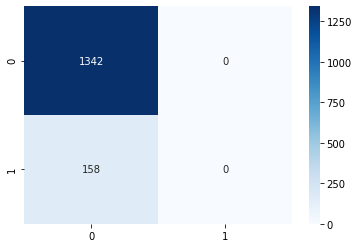

In [228]:
sns.heatmap(confusion_matrix(Y_test,SVM_Predictions), annot=True, cmap='Blues',fmt='g')

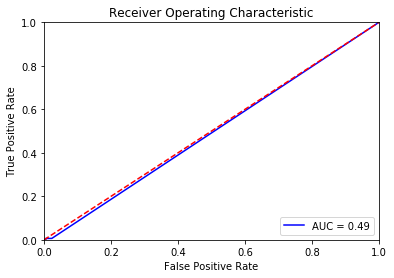

In [201]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = SVM_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [202]:
SVM_Accuracy_RBF = accuracy_score(Y_test,SVM_Predictions)
SVM_Accuracy_RBF

0.8946666666666667

In [203]:
SVM_Gini_RBF = 2*roc_auc - 1
SVM_Gini_RBF

-0.016690561980041152

In [204]:
SVM_AUC_RBF = roc_auc
SVM_AUC_RBF

0.4916547190099794

In [ ]:
#This is the worst situation. When AUC is approximately 0.49, model has no discrimination capacity 
#to distinguish between positive class and negative class.

# Comparing models

In [289]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],
           [KNN_Accuracy,KNN_Gini,KNN_AUC], 
           [KNN_Accuracy_scaled,KNN_Gini_scaled,KNN_AUC_scaled], 
           [SVM_Accuracy_Linear,SVM_Gini_Linear,SVM_AUC_Linear],
           [SVM_Accuracy_RBF,SVM_Gini_RBF,SVM_AUC_RBF]]

In [290]:
pandas.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN', 'KNN_Scaled','SVM_Linear', 'SVM_RBF'])

Accuracy  Gini Index       AUC
Logistic    0.902000    0.841404  0.920702
Naive       0.888000    0.859165  0.929583
KNN         0.890000    0.221651  0.610826
KNN_Scaled  1.000000    1.000000  1.000000
SVM_Linear  0.894667   -0.016691  0.491655
SVM_RBF     0.894667   -0.016691  0.491655

In [ ]:
# scaled KNN algorithm gives the best result for class 1 till now, , Its overfitting

In [250]:
def zscore(x):
    mean = x.mean()
    std = x.std()
    z_score = (x-mean)/std
    return z_score

In [256]:
Source.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [257]:
Source_Subset = Source[['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard']]

In [258]:
#Scale the data using the Zscore function defined earlier. Can use Minmax scalar, standard scalar etc in scikit learn
X_Scaled = Source_Subset.apply(zscore)

In [259]:
X_Scaled.head()

ID       Age  Experience    Income  ZIP Code    Family     CCAvg  \
0 -1.731531 -1.774239   -1.665912 -0.538175 -0.964018  1.397274 -0.193366   
1 -1.730839 -0.029521   -0.096321 -0.864023 -1.443787  0.525938 -0.250586   
2 -1.730146 -0.552936   -0.445119 -1.363657  0.738740 -1.216733 -0.536683   
3 -1.729453 -0.901880   -0.968316  0.569708  0.452198 -1.216733  0.436047   
4 -1.728760 -0.901880   -1.055515 -0.625068 -0.858921  1.397274 -0.536683   

   Education  Mortgage  Personal Loan  Securities Account  CD Account  \
0  -1.048973 -0.555468      -0.325843            2.928622   -0.253515   
1  -1.048973 -0.555468      -0.325843            2.928622   -0.253515   
2  -1.048973 -0.555468      -0.325843           -0.341389   -0.253515   
3   0.141689 -0.555468      -0.325843           -0.341389   -0.253515   
4   0.141689 -0.555468      -0.325843           -0.341389   -0.253515   

     Online  CreditCard  
0 -1.216496   -0.645250  
1 -1.216496   -0.645250  
2 -1.216496   -0.645250  
3 -1.216496   -0.645250  
4 -1.216496    1.549477

In [261]:
#Performing train test split again

X_train, X_test, Y_train, Y_test = train_test_split(X_Scaled, y_Source, test_size=.3, random_state=100)

In [262]:
X_train.head()

ID       Age  Experience    Income  ZIP Code    Family     CCAvg  \
4966  1.708670 -0.378464   -0.270720 -0.864023 -0.844311 -1.216733 -0.708341   
4086  1.099050  0.406659    0.514076 -1.363657 -0.021916  1.397274 -0.994438   
2881  0.264285  0.319423    0.426877 -0.407836 -0.494616  1.397274 -1.051657   
1237 -0.874598 -0.640172   -0.619518  2.068609 -0.499329 -1.216733  2.782043   
1429 -0.741590 -1.250824   -1.317114 -0.842300  0.900862 -1.216733 -0.765560   

      Education  Mortgage  Personal Loan  Securities Account  CD Account  \
4966  -1.048973  0.850437      -0.325843           -0.341389   -0.253515   
4086  -1.048973 -0.555468      -0.325843            2.928622   -0.253515   
2881   1.332351 -0.555468      -0.325843           -0.341389   -0.253515   
1237   1.332351 -0.555468       3.068352           -0.341389    3.943752   
1429   1.332351  1.125719      -0.325843           -0.341389   -0.253515   

        Online  CreditCard  
4966 -1.216496   -0.645250  
4086 -1.216496   -0.645250  
2881  0.821869   -0.645250  
1237  0.821869    1.549477  
1429 -1.216496   -0.645250

In [263]:
SVM_Model = svm.SVC(kernel = 'rbf', C = 100, probability=True)
SVM_Model.fit(X_train,Y_train)
SVM_Predictions = SVM_Model.predict(X_test)
SVM_Predictions

array([0, 0, 0, ..., 1, 0, 1])

In [264]:
print(classification_report(Y_test,SVM_Predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1342
           1       1.00      1.00      1.00       158

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



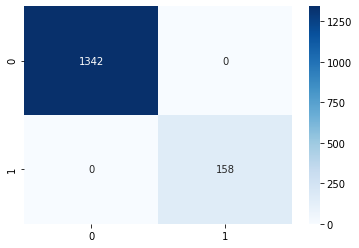

In [265]:
sns.heatmap(confusion_matrix(Y_test,SVM_Predictions), annot=True, cmap='Blues',fmt='g')

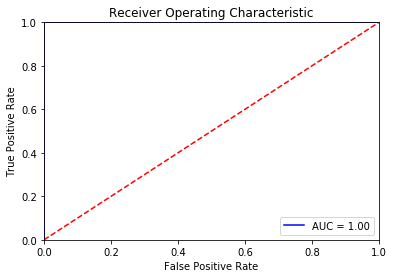

In [266]:
# calculate the fpr and tpr for all thresholds of the classification

# Firstly, calculate the probabilities of predictions made
probs = SVM_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [267]:
SVM_Accuracy_RBF_Scaled = accuracy_score(Y_test,SVM_Predictions)
SVM_Accuracy_RBF_Scaled

1.0

In [268]:
SVM_Gini_RBF_Scaled = 2*roc_auc - 1
SVM_Gini_RBF_Scaled

1.0

In [269]:
SVM_AUC_RBF_Scaled = roc_auc
SVM_AUC_RBF_Scaled

1.0

In [274]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],
           [KNN_Accuracy,KNN_Gini,KNN_AUC], 
           [KNN_Accuracy_scaled,KNN_Gini_scaled,KNN_AUC_scaled], 
           [SVM_Accuracy_Linear,SVM_Gini_Linear,SVM_AUC_Linear],
           [SVM_Accuracy_RBF,SVM_Gini_RBF,SVM_AUC_RBF],
           [SVM_Accuracy_RBF_Scaled,SVM_Gini_RBF_Scaled,SVM_AUC_RBF_Scaled]]

In [275]:
pandas.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN', 'KNN_Scaled','SVM_Linear', 'SVM_RBF', 'SVM_RBF_Scaled'])

Accuracy  Gini Index       AUC
Logistic        0.902000    0.841404  0.920702
Naive           0.888000    0.859165  0.929583
KNN             0.890000    0.221651  0.610826
KNN_Scaled      0.944667    0.000000  0.500000
SVM_Linear      0.894667   -0.016691  0.491655
SVM_RBF         0.894667   -0.016691  0.491655
SVM_RBF_Scaled  1.000000    1.000000  1.000000

In [ ]:
# we get 100% accuracy for scaled SVM_RBF, Its overfitting

# Determining Optimal hyper parameter and build SVM_RBF model again


#Determine Important Variables through Variable Importance Factor analysis
#Determine Cost Complexity through Elbow or Cree plot
#Based on the optimal hyperparameter, build SVM RBF again
#Compare Models

In [247]:
predictor_variables_VIF = ['Age', 'Experience', 'Income', 'Family',
       'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard']

df_predictor = Source[predictor_variables_VIF].copy(deep = True)
df_predictor = df_predictor.dropna()

from statsmodels.stats.outliers_influence import variance_inflation_factor
threshold = 80
for i in numpy.arange(0,len(predictor_variables_VIF)):
    vif = [variance_inflation_factor(df_predictor[predictor_variables_VIF].values, j) 
    for j in range(df_predictor[predictor_variables_VIF].shape[1])]
    maxindex = vif.index(max(vif))
    if max(vif) > threshold:
        print ("VIF :", vif)
        print('Eliminating \'' + df_predictor[predictor_variables_VIF].columns[maxindex] + '\' at index: ' + str(maxindex))
        del predictor_variables_VIF[maxindex]
    else:
        break

VIF : [84.85344196043876, 32.06821437153315, 7.749141160398855, 5.63377197295822, 3.867740146053175, 7.092970270616851, 1.3765961179517776, 1.794873954075421, 1.276537387355382, 1.5381267187705685, 2.5784944828177956, 1.5781472666608363]
Eliminating 'Age' at index: 0


In [245]:
predictor_variables_VIF.sort()
predictor_variables_VIF

['CCAvg',
 'CD Account',
 'CreditCard',
 'Education',
 'Experience',
 'Family',
 'Income',
 'Mortgage',
 'Online',
 'Personal Loan',
 'Securities Account']

In [291]:
X_PredictorVIF = X_Scaled[['CCAvg',
 'CD Account',
 'CreditCard',
 'Education',
 'Experience',
 'Family',
 'Income',
 'Mortgage',
 'Online',
 'Personal Loan',
 'Securities Account']]

In [292]:
X_PredictorVIF.head()

CCAvg  CD Account  CreditCard  Education  Experience    Family  \
0 -0.193366   -0.253515   -0.645250  -1.048973   -1.665912  1.397274   
1 -0.250586   -0.253515   -0.645250  -1.048973   -0.096321  0.525938   
2 -0.536683   -0.253515   -0.645250  -1.048973   -0.445119 -1.216733   
3  0.436047   -0.253515   -0.645250   0.141689   -0.968316 -1.216733   
4 -0.536683   -0.253515    1.549477   0.141689   -1.055515  1.397274   

     Income  Mortgage    Online  Personal Loan  Securities Account  
0 -0.538175 -0.555468 -1.216496      -0.325843            2.928622  
1 -0.864023 -0.555468 -1.216496      -0.325843            2.928622  
2 -1.363657 -0.555468 -1.216496      -0.325843           -0.341389  
3  0.569708 -0.555468 -1.216496      -0.325843           -0.341389  
4 -0.625068 -0.555468 -1.216496      -0.325843           -0.341389

In [293]:
numpy.random.random(100)

array([0.61211189, 0.77135992, 0.86066977, 0.15063697, 0.19851876,
       0.81516293, 0.15881535, 0.11613783, 0.01290753, 0.48683344,
       0.33101543, 0.80263957, 0.09825194, 0.05599345, 0.44266265,
       0.02214391, 0.29072855, 0.24639444, 0.73828677, 0.88922613,
       0.9871393 , 0.11744339, 0.39378235, 0.45272981, 0.53814784,
       0.7906221 , 0.46583634, 0.43533225, 0.56947866, 0.969259  ,
       0.04055615, 0.54811957, 0.4625766 , 0.37647223, 0.32791208,
       0.81352893, 0.64655232, 0.04742648, 0.99495757, 0.68923564,
       0.92954594, 0.91811655, 0.97530172, 0.39700197, 0.26262609,
       0.43015136, 0.76453077, 0.59973081, 0.08094696, 0.70454447,
       0.16401332, 0.03234935, 0.32815036, 0.47386   , 0.06808472,
       0.3827107 , 0.11855414, 0.89632852, 0.76430853, 0.37540494,
       0.02581418, 0.90653093, 0.78641778, 0.61931523, 0.21158894,
       0.292304  , 0.66154467, 0.88626098, 0.67117646, 0.32968079,
       0.2073618 , 0.01163207, 0.07154342, 0.73005591, 0.97983

In [294]:
numpy.random.randint(100,size=100)

array([ 8, 75, 15, 20, 16, 64, 61, 96, 83, 57, 49, 62, 57, 83, 27, 87, 35,
       36, 84, 61, 28,  1, 11, 62, 17, 30, 38, 98, 25, 56, 24, 12, 76, 96,
        8, 47, 87, 25, 21, 22, 45, 19, 41, 47, 36, 39, 17, 39, 59, 82, 37,
       98, 87, 38,  8, 54, 17, 41, 47, 19, 43, 44, 35, 42, 20, 26, 89, 23,
        2, 65, 89, 27, 78, 68, 91, 60,  3, 81, 47, 61, 63, 32, 13, 56, 48,
       58, 94, 35, 57, 60, 83,  9, 60, 50, 51, 49, 71, 81,  4,  3])

In [295]:
lists = [0.61211189, 0.77135992, 0.86066977, 0.15063697, 0.19851876,
       0.81516293, 0.15881535, 0.11613783, 0.01290753, 0.48683344,
       0.33101543, 0.80263957, 0.09825194, 0.05599345, 0.44266265,
       0.02214391, 0.29072855, 0.24639444, 0.73828677, 0.88922613,
       0.9871393 , 0.11744339, 0.39378235, 0.45272981, 0.53814784,
       0.7906221 , 0.46583634, 0.43533225, 0.56947866, 0.969259  ,
       0.04055615, 0.54811957, 0.4625766 , 0.37647223, 0.32791208,
       0.81352893, 0.64655232, 0.04742648, 0.99495757, 0.68923564,
       0.92954594, 0.91811655, 0.97530172, 0.39700197, 0.26262609,
       0.43015136, 0.76453077, 0.59973081, 0.08094696, 0.70454447,
       0.16401332, 0.03234935, 0.32815036, 0.47386   , 0.06808472,
       0.3827107 , 0.11855414, 0.89632852, 0.76430853, 0.37540494,
       0.02581418, 0.90653093, 0.78641778, 0.61931523, 0.21158894,
       0.292304  , 0.66154467, 0.88626098, 0.67117646, 0.32968079,
       0.2073618 , 0.01163207, 0.07154342, 0.73005591, 0.9798396 ,
       0.69001621, 0.99057483, 0.69053432, 0.94812322, 0.58364465,
       0.53155327, 0.16865734, 0.15880774, 0.93796532, 0.71826456,
       0.47654265, 0.88365336, 0.40420231, 0.17146805, 0.13183202,
       0.41190816, 0.02485604, 0.5635608 , 0.78187792, 0.26705997,
       0.21425496, 0.17755704, 0.42926568, 0.97211312, 0.04653158,
        8, 75, 15, 20, 16, 64, 61, 96, 83, 57, 49, 62, 57, 83, 27, 87, 35,
       36, 84, 61, 28,  1, 11, 62, 17, 30, 38, 98, 25, 56, 24, 12, 76, 96,
        8, 47, 87, 25, 21, 22, 45, 19, 41, 47, 36, 39, 17, 39, 59, 82, 37,
       98, 87, 38,  8, 54, 17, 41, 47, 19, 43, 44, 35, 42, 20, 26, 89, 23,
        2, 65, 89, 27, 78, 68, 91, 60,  3, 81, 47, 61, 63, 32, 13, 56, 48,
       58, 94, 35, 57, 60, 83,  9, 60, 50, 51, 49, 71, 81,  4,  3]

Scores    C Param
0    1.000000   0.612112
1    1.000000   0.771360
2    1.000000   0.860670
3    1.000000   0.150637
4    1.000000   0.198519
5    1.000000   0.815163
6    1.000000   0.158815
7    1.000000   0.116138
8    0.930000   0.012908
9    1.000000   0.486833
10   1.000000   0.331015
11   1.000000   0.802640
12   1.000000   0.098252
13   0.998000   0.055993
14   1.000000   0.442663
15   0.967333   0.022144
16   1.000000   0.290729
17   1.000000   0.246394
18   1.000000   0.738287
19   1.000000   0.889226
20   1.000000   0.987139
21   1.000000   0.117443
22   1.000000   0.393782
23   1.000000   0.452730
24   1.000000   0.538148
25   1.000000   0.790622
26   1.000000   0.465836
27   1.000000   0.435332
28   1.000000   0.569479
29   1.000000   0.969259
..        ...        ...
170  1.000000  89.000000
171  1.000000  27.000000
172  1.000000  78.000000
173  1.000000  68.000000
174  1.000000  91.000000
175  1.000000  60.000000
176  1.000000   3.000000
177  1.000000  81.000000
178  1.000000  47.000000
179  1.000000  61.000000
180  1.000000  63.000000
181  1.000000  32.000000
182  1.000000  13.000000
183  1.000000  56.000000
184  1.000000  48.000000
185  1.000000  58.000000
186  1.000000  94.000000
187  1.000000  35.000000
188  1.000000  57.000000
189  1.000000  60.000000
190  1.000000  83.000000
191  1.000000   9.000000
192  1.000000  60.000000
193  1.000000  50.000000
194  1.000000  51.000000
195  1.000000  49.000000
196  1.000000  71.000000
197  1.000000  81.000000
198  1.000000   4.000000
199  1.000000   3.000000

[200 rows x 2 columns]

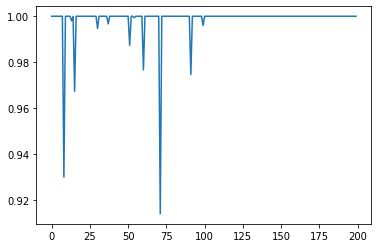

In [303]:
X_train_VIF, X_test_VIF, Y_train, Y_test = train_test_split(X_PredictorVIF, y_Source, test_size=.3, random_state=100)

Test_SVM_scores = []
Cost_Complexity = []
for i in lists:    
    
    Test_Cost_Complexity = svm.SVC(kernel = 'rbf', C = i, probability=True)
    Test_Cost_Complexity.fit(X_train_VIF, Y_train)
    Y_predict_Test = Test_Cost_Complexity.predict(X_test_VIF)
    scores = Test_Cost_Complexity.score(X_test_VIF, Y_test)
    Test_SVM_scores.append(scores)
    Cost_Complexity.append(i)
    
        
matplot.plot(Test_SVM_scores)

pandas.concat([pandas.DataFrame(Test_SVM_scores, columns = ['Scores']),
               pandas.DataFrame(Cost_Complexity, columns = ['C Param'])], axis = 1)

In [322]:
Cost_using_elbow_VIF = 1.0

In [338]:
X_train, X_test, Y_train, Y_test = train_test_split(X_PredictorVIF, y_Source, test_size=.3, random_state=100)
X_train.head()

CCAvg  CD Account  CreditCard  Education  Experience    Family  \
4966 -0.708341   -0.253515   -0.645250  -1.048973   -0.270720 -1.216733   
4086 -0.994438   -0.253515   -0.645250  -1.048973    0.514076  1.397274   
2881 -1.051657   -0.253515   -0.645250   1.332351    0.426877  1.397274   
1237  2.782043    3.943752    1.549477   1.332351   -0.619518 -1.216733   
1429 -0.765560   -0.253515   -0.645250   1.332351   -1.317114 -1.216733   

        Income  Mortgage    Online  Personal Loan  Securities Account  
4966 -0.864023  0.850437 -1.216496      -0.325843           -0.341389  
4086 -1.363657 -0.555468 -1.216496      -0.325843            2.928622  
2881 -0.407836 -0.555468  0.821869      -0.325843           -0.341389  
1237  2.068609 -0.555468  0.821869       3.068352           -0.341389  
1429 -0.842300  1.125719 -1.216496      -0.325843           -0.341389

In [340]:
SVM_Model = svm.SVC(kernel = 'rbf', C = 1.0, probability=True)
SVM_Model.fit(X_train,Y_train)
SVM_Predictions = SVM_Model.predict(X_test)
SVM_Predictions

array([0, 0, 0, ..., 1, 0, 1])

In [337]:
print(classification_report(Y_test,SVM_Predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2244
           1       1.00      1.00      1.00       256

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



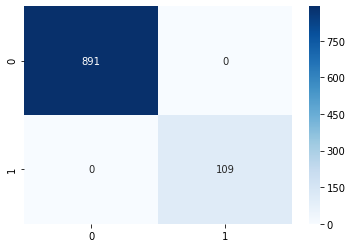

In [334]:
sns.heatmap(confusion_matrix(Y_test,SVM_Predictions), annot=True, cmap='Blues',fmt='g')

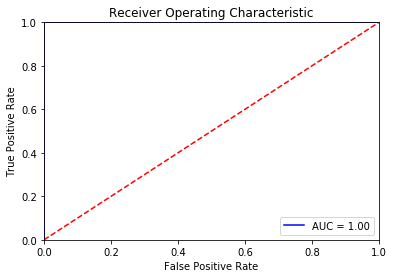

In [326]:
probs = SVM_Model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
metrics
# method to plot
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [327]:
SVM_Accuracy_RBF_Scaled_VIF_C = accuracy_score(Y_test,SVM_Predictions)
SVM_Accuracy_RBF_Scaled_VIF_C

1.0

In [328]:
SVM_Gini_RBF_Scaled_VIF_C = 2*roc_auc - 1
SVM_Gini_RBF_Scaled_VIF_C

1.0

In [329]:
SVM_AUC_RBF_Scaled_VIF_C = roc_auc
SVM_AUC_RBF_Scaled_VIF_C

1.0

In [316]:
Compare = [[Logistic_Accuracy,Logistic_Gini,Logistic_AUC],
           [Naive_Accuracy,Naive_Gini,Naive_AUC],
           [KNN_Accuracy,KNN_Gini,KNN_AUC], 
           [KNN_Accuracy_scaled,KNN_Gini_scaled,KNN_AUC_scaled], 
           [SVM_Accuracy_Linear,SVM_Gini_Linear,SVM_AUC_Linear],
           [SVM_Accuracy_RBF,SVM_Gini_RBF,SVM_AUC_RBF],
           [SVM_Accuracy_RBF_Scaled,SVM_Gini_RBF_Scaled,SVM_AUC_RBF_Scaled],
          [SVM_Accuracy_RBF_Scaled_VIF_C,SVM_Gini_RBF_Scaled_VIF_C,SVM_AUC_RBF_Scaled_VIF_C]]

In [317]:
pandas.DataFrame(Compare, columns= ['Accuracy','Gini Index', 'AUC'], index=['Logistic','Naive','KNN', 'KNN_Scaled','SVM_Linear', 'SVM_RBF', 'SVM_RBF_Scaled','SVM_RBF_Scaled_C'])

Accuracy  Gini Index       AUC
Logistic          0.902000    0.841404  0.920702
Naive             0.888000    0.859165  0.929583
KNN               0.890000    0.221651  0.610826
KNN_Scaled        1.000000    1.000000  1.000000
SVM_Linear        0.894667   -0.016691  0.491655
SVM_RBF           0.894667   -0.016691  0.491655
SVM_RBF_Scaled    1.000000    1.000000  1.000000
SVM_RBF_Scaled_C  1.000000    1.000000  1.000000